In [1]:
%matplotlib notebook
from Tafel_LPR_fit_notebook_IRcomp_IFilm import*

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score


<IPython.core.display.Javascript object>


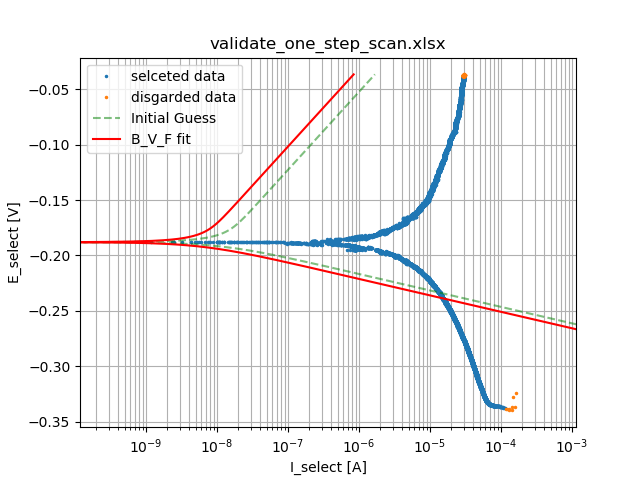

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFJhbmdlU2xpZGVyKHZhbHVlPSg5LCAyOTg0NyksIGNvbnRpbnVvdXNfdXBkYXRlPUZhbHNlLCBkZXNjcmlwdGlvbj11J2RhdGFfcmFuZ2UnLCBsYXnigKY=


In [2]:
test1 = Tafit(Info('validate_one_step_scan.xlsx',area=1))
test1.BVF_LPR_interact(anodic_range=0.15,cathodic_range=0.15)

<IPython.core.display.Javascript object>


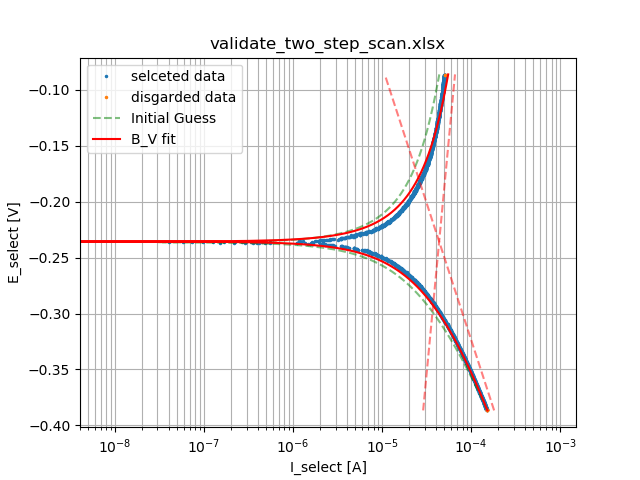

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFJhbmdlU2xpZGVyKHZhbHVlPSg1LCAzMDE5KSwgY29udGludW91c191cGRhdGU9RmFsc2UsIGRlc2NyaXB0aW9uPXUnZGF0YV9yYW5nZScsIGxheW/igKY=


In [3]:
test2 = Tafit(Info('validate_two_step_scan.xlsx',area=1, scantype='two_step'))
test2.BV_LPR_interact(anodic_range=0.15,cathodic_range=0.15)

In [7]:
test2.plot_BV_F_components()

<IPython.core.display.Javascript object>


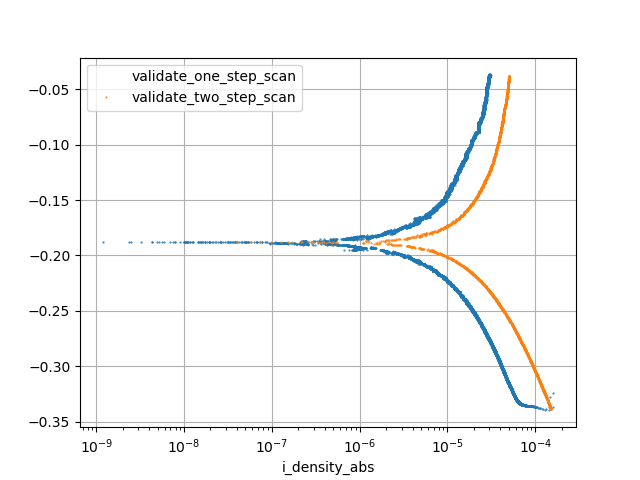

In [9]:
plot_compare([test1.info,test2.info])


# Validation with generated data

In [25]:
# Known parameters
Ecorr = -0.5
Icorr = 1e-5
Ba = 0.2
Bc = -0.3
pars = (Ecorr,Icorr,Ba,Bc)

In [39]:
df=pd.DataFrame(columns=['I','E'])
E = np.linspace(Ecorr-0.2,Ecorr+0.2,2400) # scan range OCP+-0.2V, sample rate 1s at 0.167 mV/s
df['I'] = BVeq(E=E, Eeq=Ecorr, i0=Icorr, Ba=Ba, Bc=Bc)
df['E'] = E+2e-3*np.random.randn(2400)

<IPython.core.display.Javascript object>


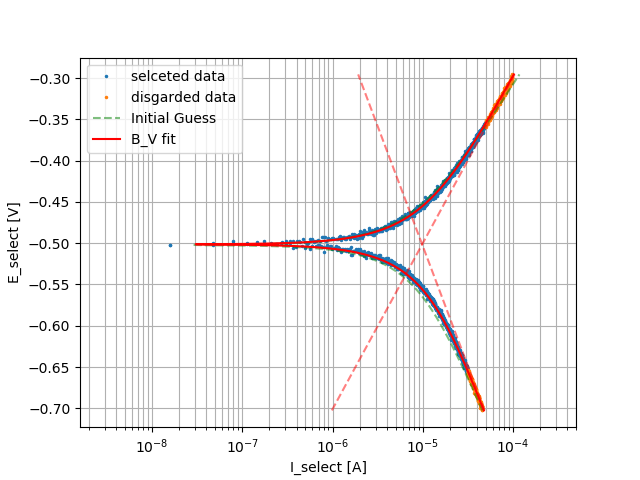

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFJhbmdlU2xpZGVyKHZhbHVlPSgyNjgsIDIwNjkpLCBjb250aW51b3VzX3VwZGF0ZT1GYWxzZSwgZGVzY3JpcHRpb249dSdkYXRhX3JhbmdlJywgbGHigKY=


In [40]:
valid1 = Tafit(Info('',pd_dfIE=df,use_pd_df=True))
valid1.BV_LPR_interact(anodic_range=0.15,cathodic_range=0.15)

In [41]:
print valid1.result
print pars

Ecorr          -0.501450
icorr           0.000010
Ba              0.201133
Bc             -0.290612
B               0.051614
Rp           4130.793244
icorr_LPR       0.000012
dtype: float64
(-0.5, 1e-05, 0.2, -0.3)
